# Prediction using Decision Tree

# Author-Gaurikumar Shinde
### Data Science Intern @LGM
### Task - 03
### Task - Prediction using Decision Tree Algorithm

In [2]:
# Importing the libraries

In [16]:
import numpy as np

In [17]:
import pandas as pd

In [18]:
import seaborn as sns

In [19]:
import os

In [20]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [21]:
# Reading dataset

In [24]:
df=pd.read_csv("C:/Users/Rushikesh/Desktop/IRIS.csv")

In [25]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [26]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [27]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [29]:
# For konwing the count of species
df['species'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: species, dtype: int64

In [31]:
# For checking null values
df.isnull().any()

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
species         False
dtype: bool

In [ ]:
# Data description through colormap

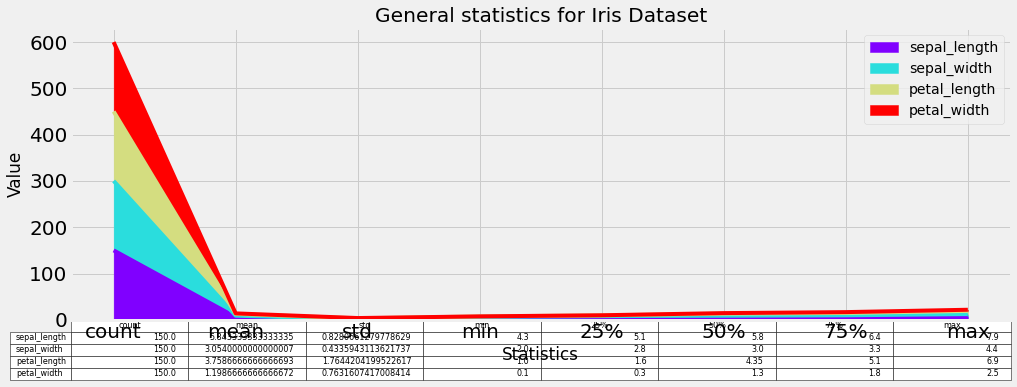

In [32]:
df.describe().plot(kind ="area",fontsize=20, figsize=(15,5),table=True,colormap="rainbow")
plt.xlabel('Statistics')
plt.ylabel('Value')
plt.title("General statistics for Iris Dataset")
plt.show()

<AxesSubplot:>

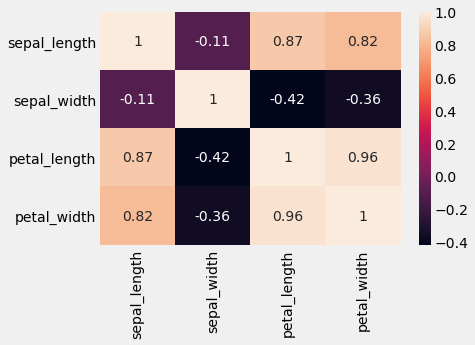

In [33]:
sns.heatmap(df.corr(),color='magenta',annot=True)

In [ ]:
# Spliting training & testing dataset

In [34]:
from sklearn.model_selection import train_test_split


In [42]:
df= df.copy()
x = df.iloc[:,1:4]
y = df.iloc[:,-1]

In [43]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=43)

In [44]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

In [45]:
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.92      1.00      0.96        12
 Iris-virginica       1.00      0.92      0.96        12

       accuracy                           0.97        38
      macro avg       0.97      0.97      0.97        38
   weighted avg       0.98      0.97      0.97        38



In [46]:
print(confusion_matrix(y_test,y_pred))

[[14  0  0]
 [ 0 12  0]
 [ 0  1 11]]


In [47]:
print(accuracy_score(y_test,y_pred)*100)

97.36842105263158


In [ ]:
# Decision tree algorithm

In [41]:
pred=clf.predict(x_test)  
print(pred)

['Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa']


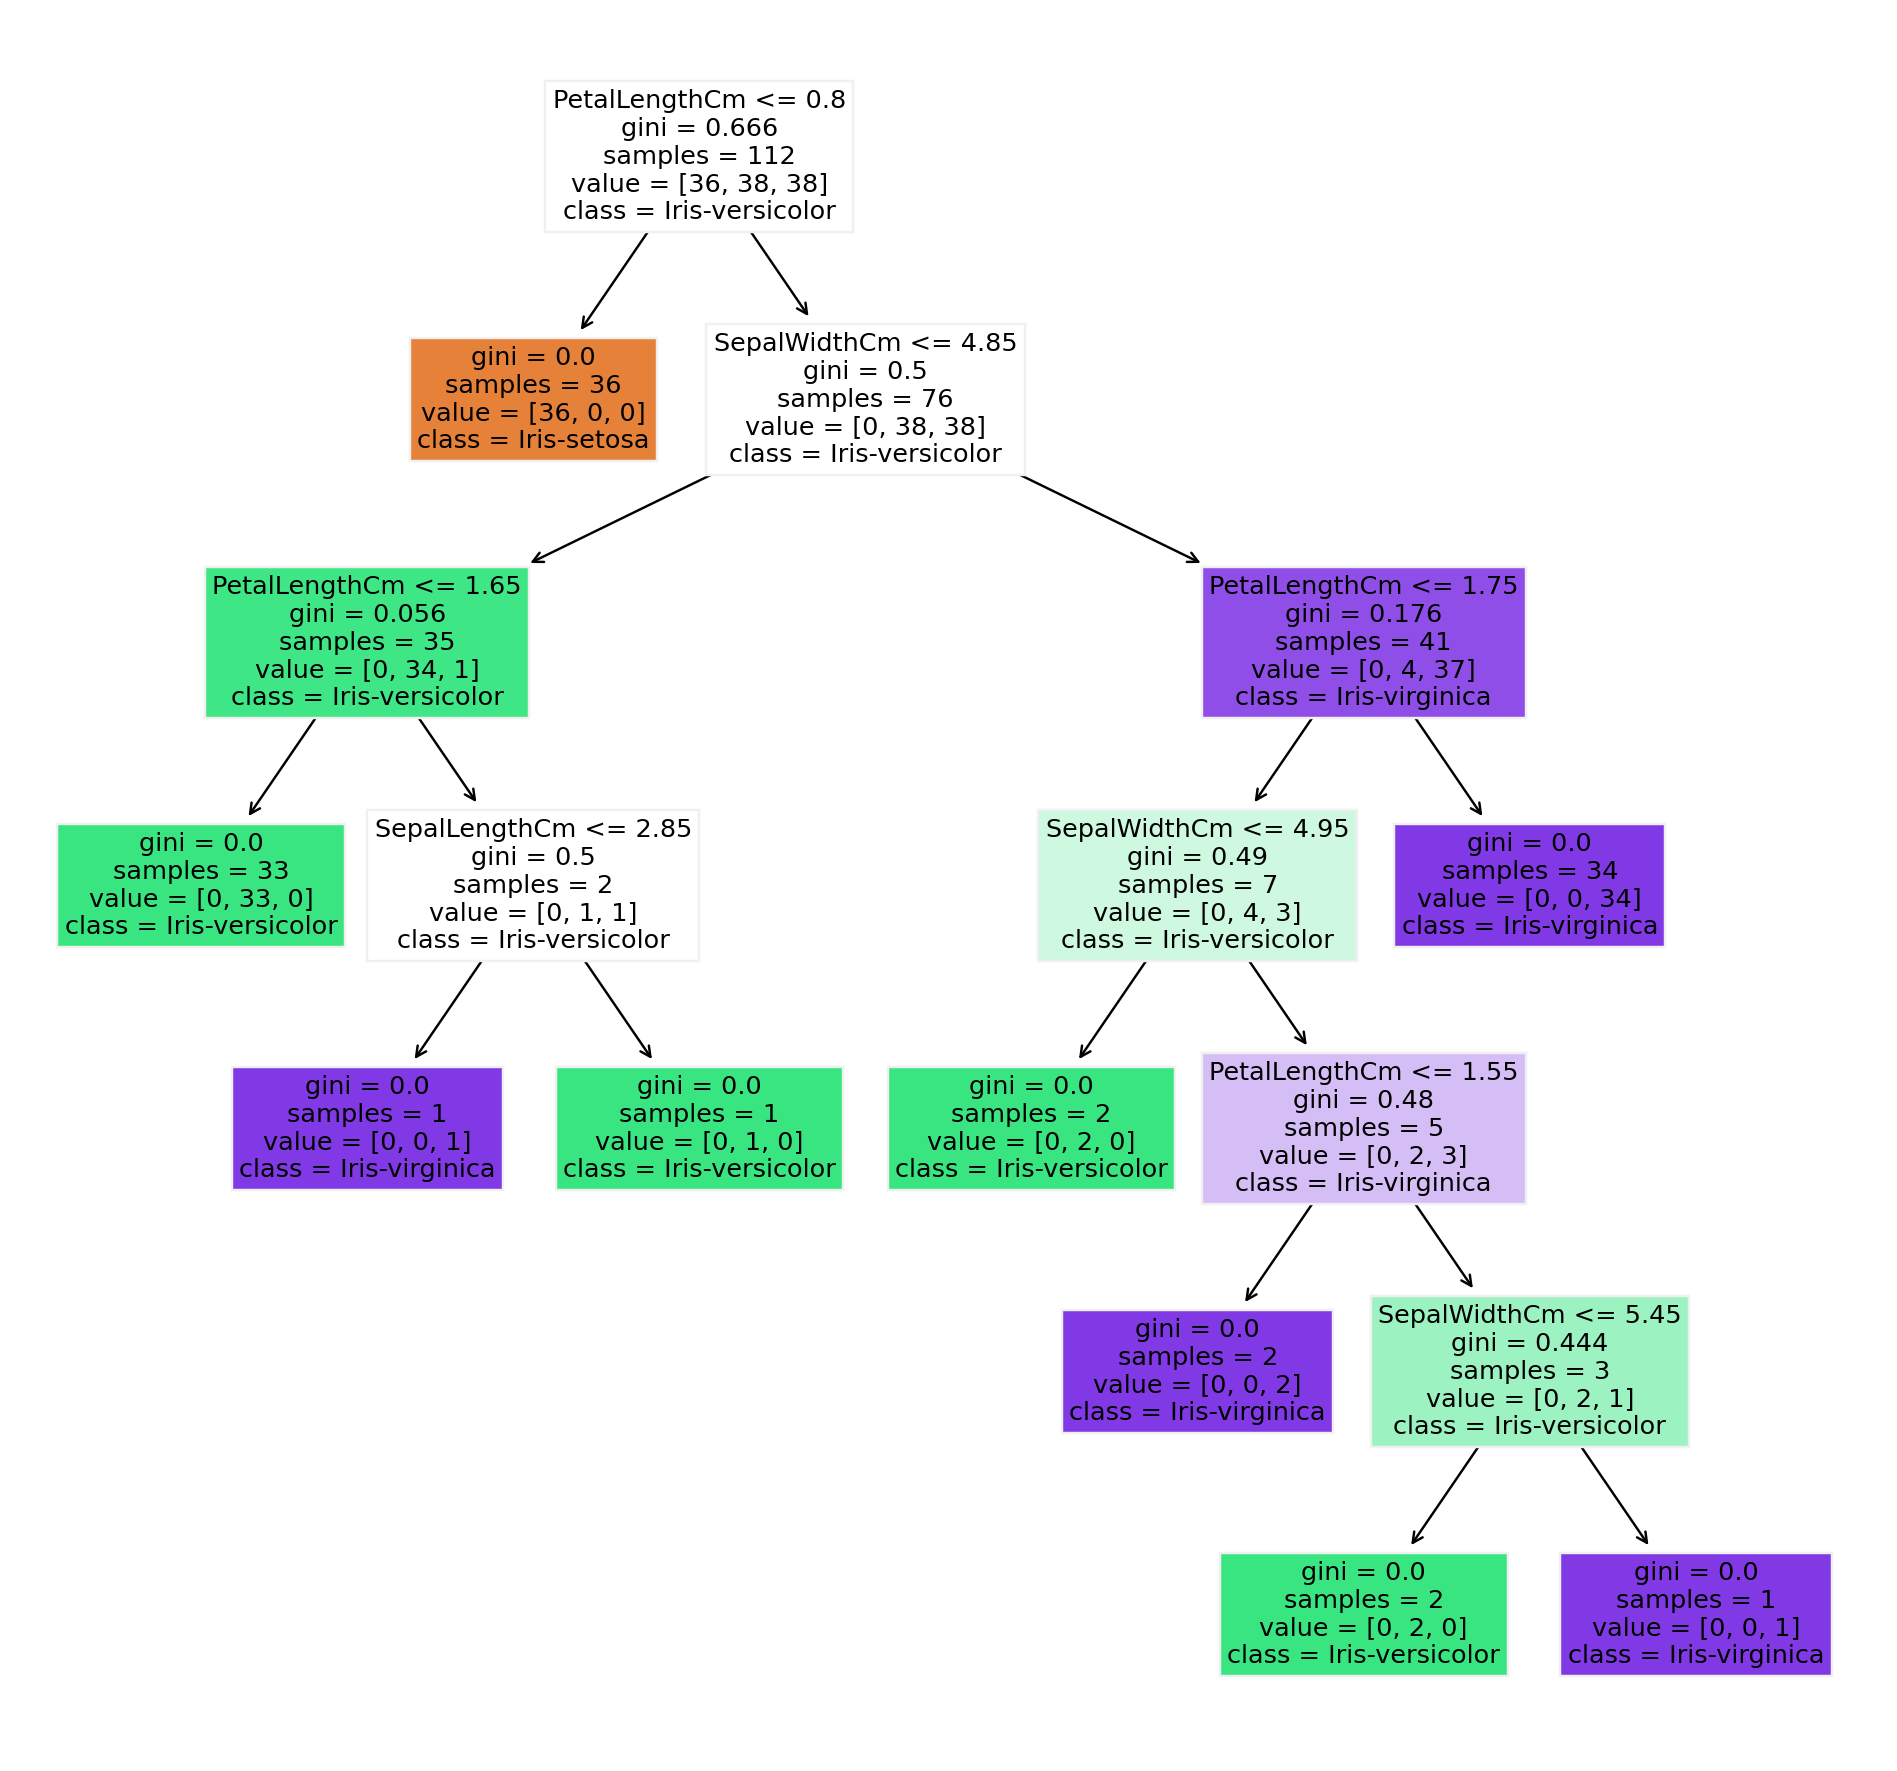

In [48]:
from sklearn import tree
feature_names = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
class_names = ['Iris-setosa','Iris-versicolor','Iris-virginica']
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(6,6),dpi=350,facecolor='white')
tree.plot_tree(clf,feature_names=feature_names,class_names=class_names,filled=True);
fig.savefig('IrisTree.png')